# DSC 630 Term Project

## Christina Vosnak

## February 9th, 2025

### Impact of Air Quality Metrics and Weather Conditions on Health

In [17]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load data
data = pd.read_csv('air_quality_health_impact_data.csv')
data.head()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0


In [3]:
# Check Size of the data
data.shape

(5811, 15)

In [4]:
# Check data types for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811 entries, 0 to 5810
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RecordID             5811 non-null   int64  
 1   AQI                  5811 non-null   float64
 2   PM10                 5811 non-null   float64
 3   PM2_5                5811 non-null   float64
 4   NO2                  5811 non-null   float64
 5   SO2                  5811 non-null   float64
 6   O3                   5811 non-null   float64
 7   Temperature          5811 non-null   float64
 8   Humidity             5811 non-null   float64
 9   WindSpeed            5811 non-null   float64
 10  RespiratoryCases     5811 non-null   int64  
 11  CardiovascularCases  5811 non-null   int64  
 12  HospitalAdmissions   5811 non-null   int64  
 13  HealthImpactScore    5811 non-null   float64
 14  HealthImpactClass    5811 non-null   float64
dtypes: float64(11), int64(4)
memory usage:

In [5]:
# Check for missing values
data.isnull().sum()

RecordID               0
AQI                    0
PM10                   0
PM2_5                  0
NO2                    0
SO2                    0
O3                     0
Temperature            0
Humidity               0
WindSpeed              0
RespiratoryCases       0
CardiovascularCases    0
HospitalAdmissions     0
HealthImpactScore      0
HealthImpactClass      0
dtype: int64

In [6]:
# Check for duplicate values
data.duplicated().sum()

0

The information above shows that there is no missing data in the dataset.

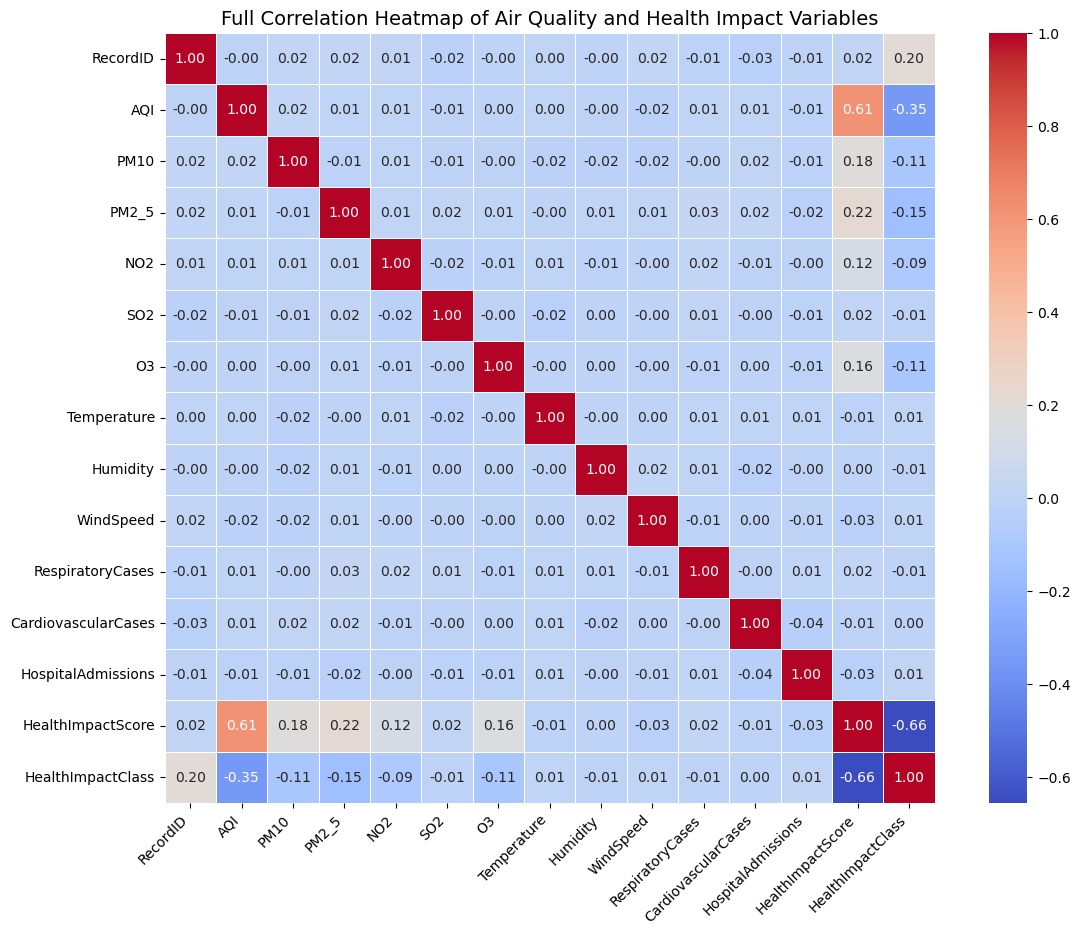

In [7]:
# Create Correlation Heatmap to conduct preliminary analysis
plt.figure(figsize=(14, 10))
heatmap = sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 10}, square=True)

# Improve layout and readability
plt.title("Full Correlation Heatmap of Air Quality and Health Impact Variables", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)

plt.show()

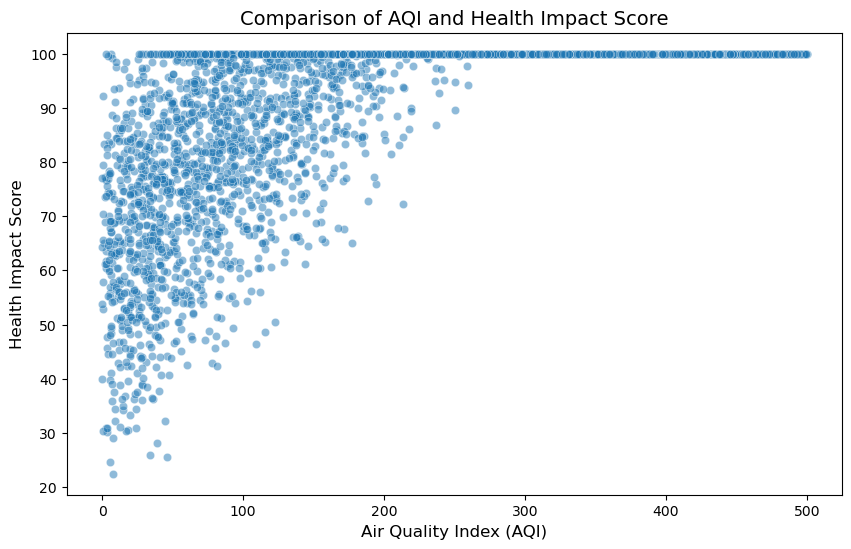

In [8]:
# Create Chart Comparing AQI and Health Impact Score
plt.figure(figsize=(10, 6))

# Scatter plot comparing AQI and Health Impact Score
sns.scatterplot(x=data['AQI'], y=data['HealthImpactScore'], alpha=0.5)

# Titles and labels
plt.title("Comparison of AQI and Health Impact Score", fontsize=14)
plt.xlabel("Air Quality Index (AQI)", fontsize=12)
plt.ylabel("Health Impact Score", fontsize=12)

# Show the plot
plt.show()

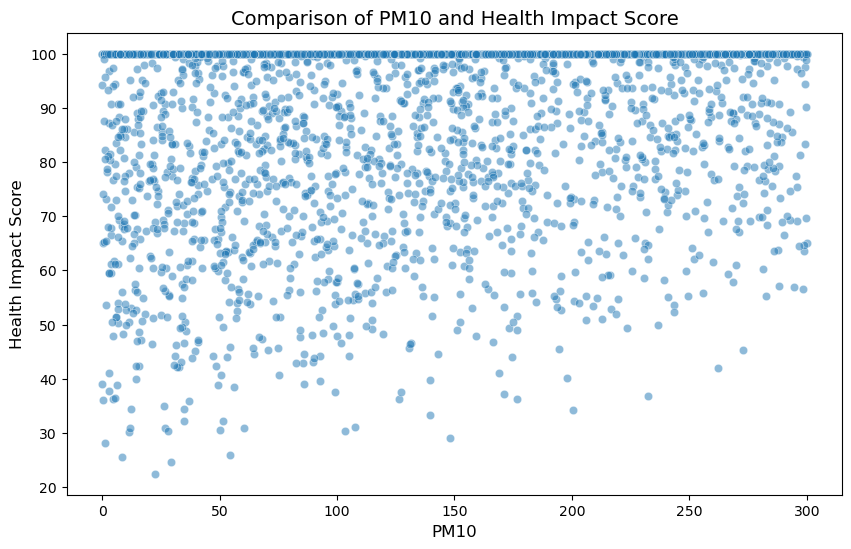

In [9]:
# Create Chart Comparing PM10 and Health Impact Score
plt.figure(figsize=(10, 6))

# Scatter plot comparing AQI and Health Impact Score
sns.scatterplot(x=data['PM10'], y=data['HealthImpactScore'], alpha=0.5)

# Titles and label
plt.title("Comparison of PM10 and Health Impact Score", fontsize=14)
plt.xlabel("PM10", fontsize=12)
plt.ylabel("Health Impact Score", fontsize=12)

# Show the plot
plt.show()

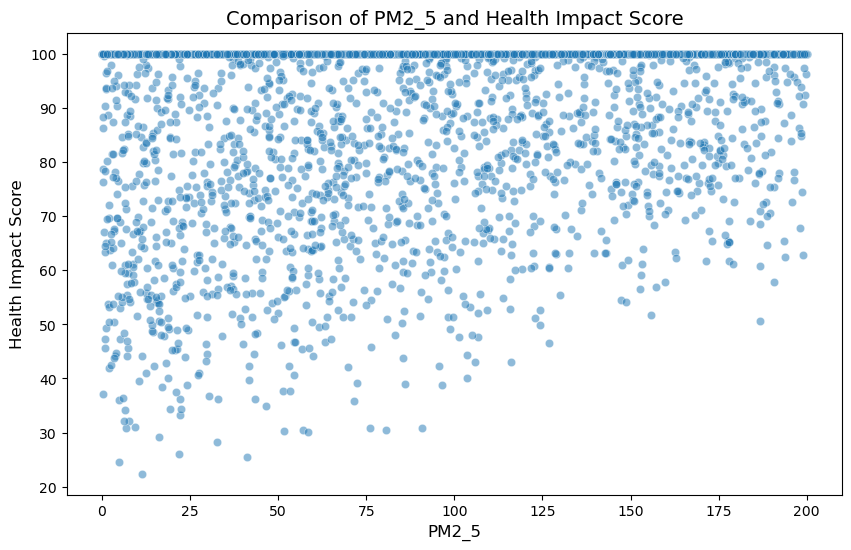

In [10]:
# Create Chart Comparing PM2_5 and Health Impact Score
plt.figure(figsize=(10, 6))

# Scatter plot comparing PM2_5 and Health Impact Score
sns.scatterplot(x=data['PM2_5'], y=data['HealthImpactScore'], alpha=0.5)

# Titles and labels
plt.title("Comparison of PM2_5 and Health Impact Score", fontsize=14)
plt.xlabel("PM2_5", fontsize=12)
plt.ylabel("Health Impact Score", fontsize=12)

# Show the plot
plt.show()

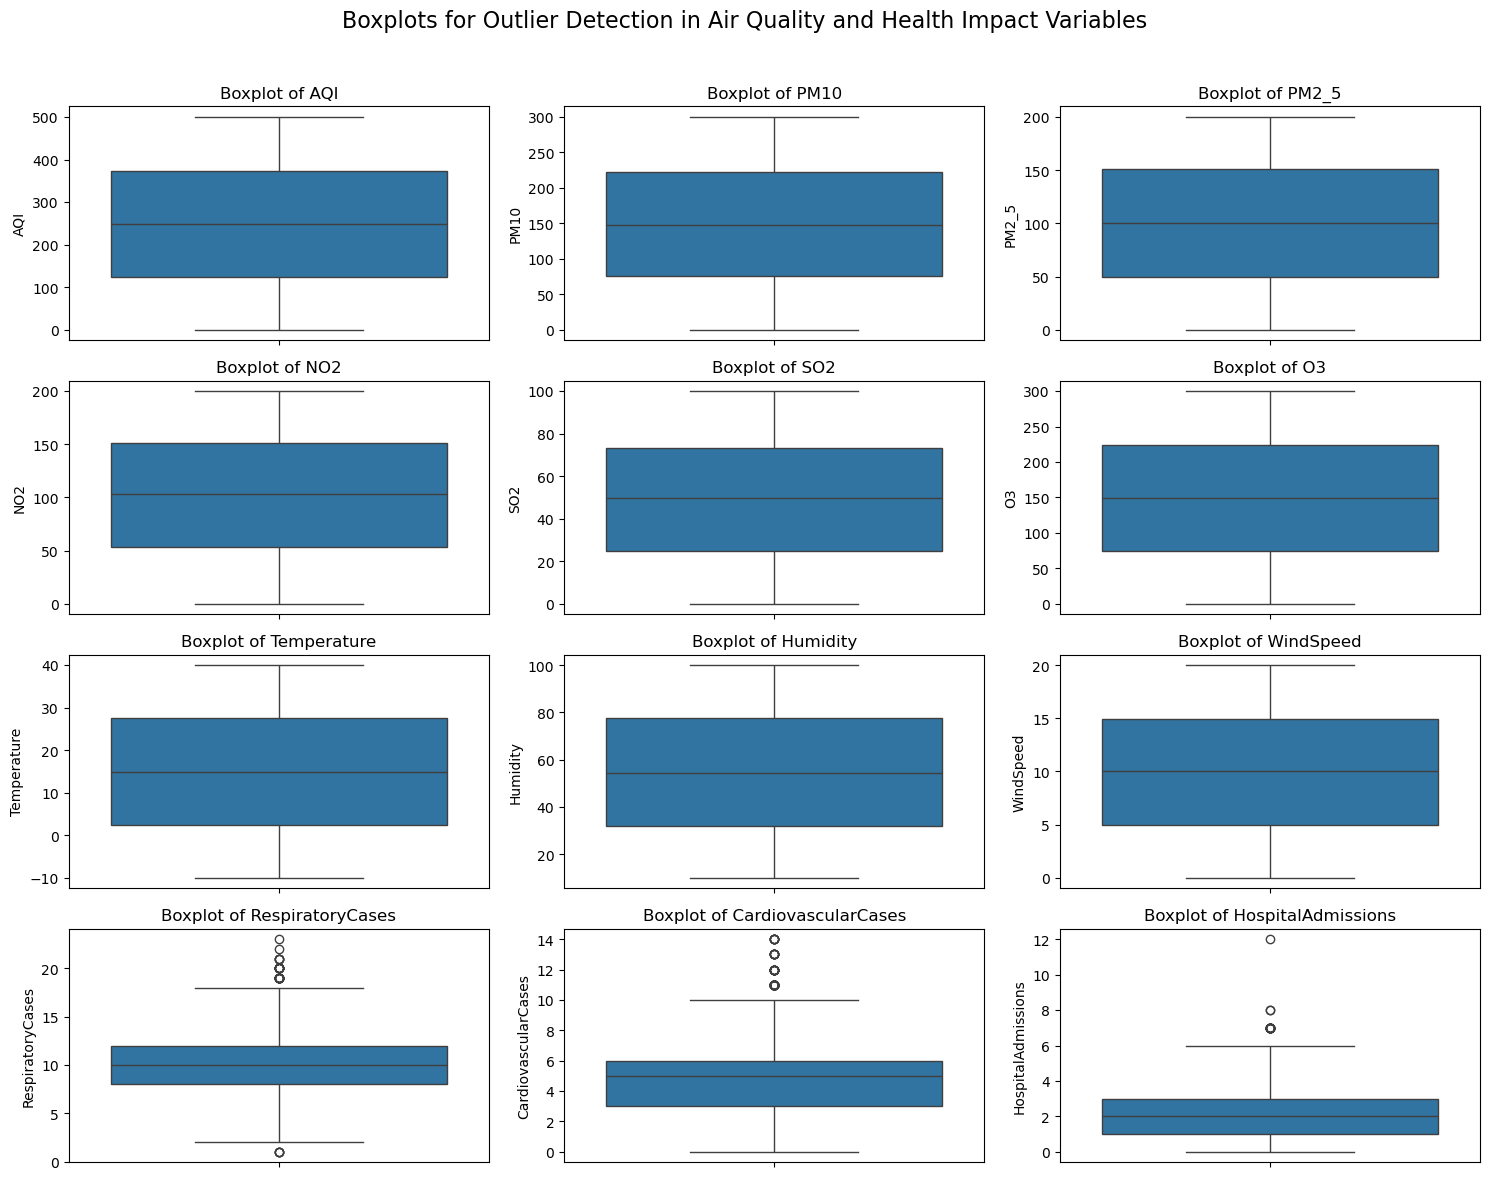

In [11]:
# Creating boxplots for outlier detection in key variables
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
fig.suptitle("Boxplots for Outlier Detection in Air Quality and Health Impact Variables", fontsize=16)

# List of columns to plot
columns_to_plot = ['AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature', 'Humidity', 'WindSpeed', 'RespiratoryCases', 'CardiovascularCases', 'HospitalAdmissions']

# Create boxplots for each variable
for ax, col in zip(axes.flatten(), columns_to_plot):
    sns.boxplot(y=data[col], ax=ax)
    ax.set_title(f"Boxplot of {col}")

# Adjust layout for better readability
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

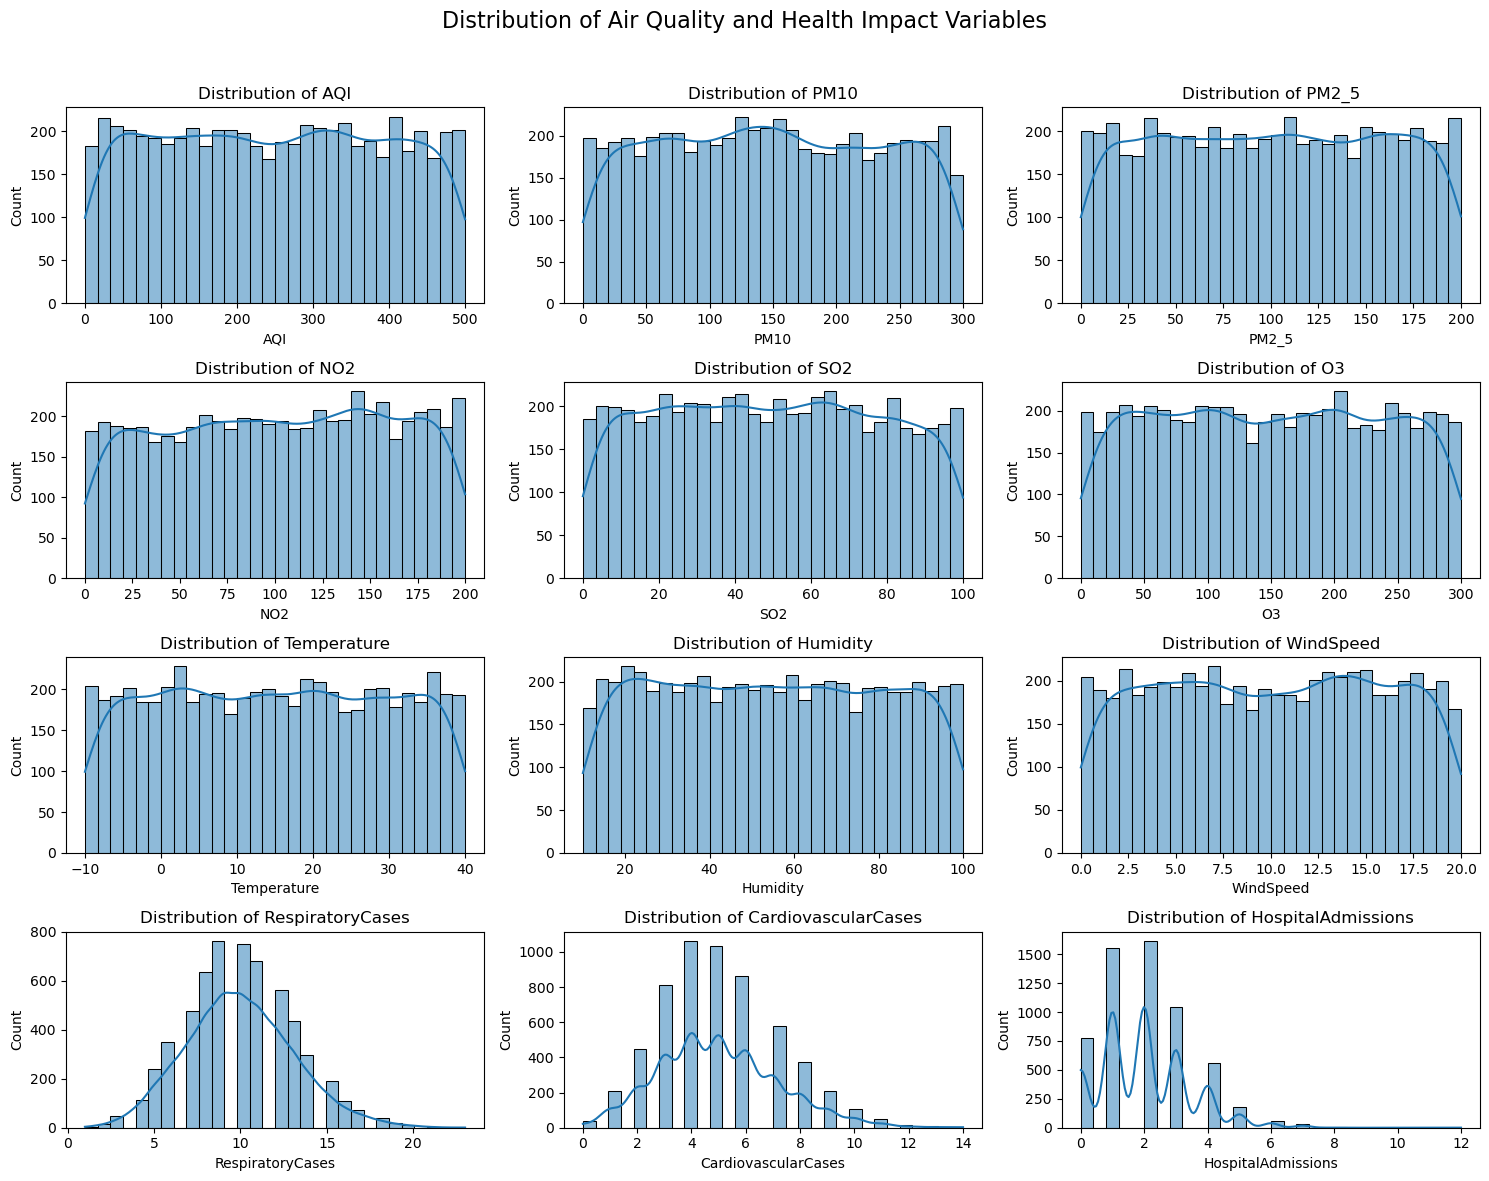

In [12]:
# Creating distribution plots for key air quality and health impact variables
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
fig.suptitle("Distribution of Air Quality and Health Impact Variables", fontsize=16)

# List of columns to plot
columns_to_plot = ['AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature', 'Humidity', 'WindSpeed', 'RespiratoryCases', 'CardiovascularCases', 'HospitalAdmissions']
# Create distribution plots for each variable
for ax, col in zip(axes.flatten(), columns_to_plot):
    sns.histplot(data[col], bins=30, kde=True, ax=ax)
    ax.set_title(f"Distribution of {col}")

# Adjust layout for better readability
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [13]:
# Function to count outliers using IQR
def count_outliers(column, data):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[column][(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers)

# Detect outliers for all numerical features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
outliers = []
for col in numerical_features:
    outliers.append({
        'Feature': col,
        'Num of outliers': count_outliers(col, data)
    })

# Convert to DataFrame and display
outliers_df = pd.DataFrame(outliers)
print(outliers_df)

                Feature  Num of outliers
0              RecordID                0
1                   AQI                0
2                  PM10                0
3                 PM2_5                0
4                   NO2                0
5                   SO2                0
6                    O3                0
7           Temperature                0
8              Humidity                0
9             WindSpeed                0
10     RespiratoryCases               42
11  CardiovascularCases               74
12   HospitalAdmissions               31
13    HealthImpactScore             1352
14    HealthImpactClass             1003


In [14]:
# Create Features and Target Variable
X = data.drop(columns=['HealthImpactScore', 'HealthImpactClass'])
y = data['HealthImpactScore']

In [18]:
# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [20]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [23]:
models = {"Linear Regression": lr, "Random Forest": rf}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R² Score:", r2_score(y_test, y_pred))
    print("-" * 40)

Model: Linear Regression
MAE: 7.356775305712758
MSE: 92.6651461558134
RMSE: 9.626273741994531
R² Score: 0.5054324194576925
----------------------------------------
Model: Random Forest
MAE: 1.5758572616603441
MSE: 10.329369986851852
RMSE: 3.213933724713665
R² Score: 0.9448706257438612
----------------------------------------


  Feature  Importance
1     AQI    0.619246
3   PM2_5    0.161854
2    PM10    0.080753


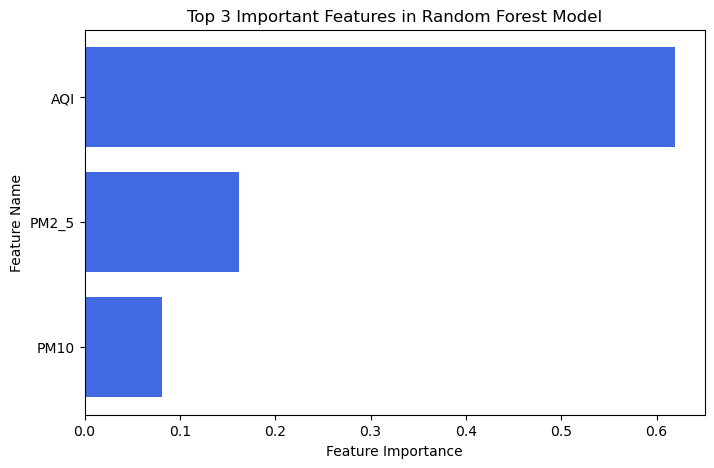

In [24]:
# Extract feature importances from the trained Random Forest model
feature_importances = rf.feature_importances_

# Create a DataFrame to pair feature names with their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance in descending order
top_features = feature_importance_df.sort_values(by="Importance", ascending=False).head(3)

# Display the top 3 features
print(top_features)

# Plot the top 3 features
plt.figure(figsize=(8, 5))
plt.barh(top_features["Feature"], top_features["Importance"], color="royalblue")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Top 3 Important Features in Random Forest Model")
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()